In [1]:
from faker import Faker
import numpy.random as npr
from dataclasses import dataclass
import numpy as np
from datetime import datetime
from threading import Thread
from time import sleep
from matplotlib import pyplot as plt

# Лабораторная работа №1

## Вариант 12.

 Сортировки: Шейкер, Пирамидальная, Быстрая

In [2]:
sizes = (100, 500, 1000, 5000, 10000, 30000, 100000)
clubsList = ("Россия Спартак-Владикавказ Владикавказ ",
"Россия Рубин Казань ",
"Россия Сочи Сочи ",
"Россия Енисей Красноярск ",
"Россия Звезда Пермь ",
"Россия Балтика Калининград ",
"Россия СКА-Хабаровск Хабаровск ",
"Россия Салют Белгород ",
"Россия Динамо Брянск ",
"Россия Торпедо Владимир ",
"Россия Ротор-Волгоград Волгоград ",
"Россия Факел Воронеж ",
"Россия Металлург Липецк ",
"Россия Химки Химки ",
"Россия Сибирь Новосибирск ",
"Россия Авангард Курск ",
"Россия Ростов Ростов ",
"Россия Крылья-советов Самара ",
"Россия Сокол Саратов ",
"Россия Урал Екатеренбург ",
"Россия Днепр Смоленск ",
"Россия Шинник Ярославль ",
"Россия Динамо  Москва ",
"Россия Зенит Санкт-Петербург ",
"Россия ЦСКА Москва ",
"Россия Спартак Москва ",
"Россия Локомотив Москва ",
"Украина Шахтер Донецк ",
"Украина Динамо Киев ",
"Украина Заря Луганск ",
"Украина Десна Чернигов ",
"Украина Кривбасс Кривой-Рог ",
"Украина Днепр Днепропетровск ",
"Украина Верес Львов ",
"Украина Звезда Кировоград ",
"Украина Черноморец Одесса ",
"Украина Оболонь Киев ",
"Украина Металлист Харьков ",
"Украина Нефтяник-Укрнефть Ахтырка ",
"Украина Сталь Алчевск ",
"Украина Арсенал Киев ",
"Украина Олимпик Донецк ",
"Украина Металлург Донецк ",
"Украина Львов Львов ",
"Украина Металлург Запорожье ",
"Украина Карпаты Львов ",
"Украина Волынь Луцк ",
"Украина Ворскла Полтава ",
"Украина Харьков Харьков ",
"Украина Говерла-Закарпатье Ужгород ")

### 1.  Генератор

In [3]:
fake = Faker('ru_RU')  
for size in sizes:
    with open(f'arrays/array{size}.txt', 'w') as file:
        for _ in range(size):
            file.write('{} {} {} {} {} {}\n'.format(
                npr.choice(clubsList),
                str(npr.randint(1955, 2020)), 
                fake.last_name_male(), 
                fake.first_name_male(), 
                fake.middle_name_male(),
                str(npr.randint(0, 66))
            ))
        print(f'{size}: ready')

100: ready
500: ready
1000: ready
5000: ready
10000: ready
30000: ready
100000: ready


### 2. Создание класса и перегрузка его операторов

In [4]:
@dataclass
class Club:
    clubCountry: str
    clubName: str
    clubCity: str
    clubYear: str
    coachName: str
    clubResult: str
     
    def __gt__(self, other):
        if int(self.clubYear) > int(other.clubYear):
            return True
        elif int(self.clubYear) == int(other.clubYear):
            if self.clubCountry > other.clubCountry:
                return True
            elif self.clubCountry == other.clubCountry:
                if int(self.clubResult) > int(other.clubResult):
                    return True
                elif int(self.clubResult) == int(other.clubResult):
                    if self.clubName > other.clubName:
                        return True
        return False
    
    def __ge__(self, other):
        if int(self.clubYear) >= int(other.clubYear):
            return True
        elif int(self.clubYear) == int(other.clubYear):
            if self.clubCountry >= other.clubCountry:
                return True
            elif self.clubCountry == other.clubCountry:
                if int(self.clubResult) >= int(other.clubResult):
                    return True
                elif int(self.clubResult) == int(other.clubResult):
                    if self.clubName >= other.clubName:
                        return True
        return False   
    
    def __lt__(self, other):
        if int(self.clubYear) < int(other.clubYear):
            return True
        elif int(self.clubYear) == int(other.clubYear):
            if self.clubCountry < other.clubCountry:
                return True
            elif self.clubCountry == other.clubCountry:
                if int(self.clubResult) < int(other.clubResult):
                    return True
                elif int(self.clubResult) == int(other.clubResult):
                    if self.clubName < other.clubName:
                        return True
        return False
    
    def __le__(self, other):
        if int(self.clubYear) <= int(other.clubYear):
            return True
        elif int(self.clubYear) == int(other.clubYear):
            if self.clubCountry <= other.clubCountry:
                return True
            elif self.clubCountry == other.clubCountry:
                if int(self.clubResult) <= int(other.clubResult):
                    return True
                elif int(self.clubResult) == int(other.clubResult):
                    if self.clubName <= other.clubName:
                        return True
        return False
        


### 3. Создание неотсортированных масивов

In [5]:


clubs = np.empty(len(sizes), dtype=np.ndarray)
for i, size in enumerate(sizes):
    with open(f'arrays/array{size}.txt') as arr:
        clubs[i] = np.empty(size, dtype=Club)
        for j, string in enumerate(arr.read()[:-1].split('\n')):
            data = string.split()
            clubs[i][j] = Club(
                clubCountry = data[0],
                clubName = data[1],
                clubCity = data[2],
                clubYear = data[3],
                coachName = ' '.join(data[4:7]),
                clubResult = data[7]
            )

### 4. Описание алгоритмов сортировок

In [6]:
def shakerSort(data):                   # Шейкер-сортировка:
    for i in range(len(data)-1, 0, -1):     # Проходим по массиву справа налево:
        swapped = False                         # Сбрасываем флаг
        for j in range(i, 0, -1):               # Идём по индексам справа налево:
            if data[j] < data[j-1]:                 # Если элемент по данному индексу меньше предыдущего:
                data[j], data[j-1] = data[j-1], data[j] # Меняем их местами
                swapped = True                          # Запоминаем, что элементы менялись местами
        for j in range(i):                      # Идём по индексам слева направо:
            if data[j] > data[j+1]:                 # Если элемент по данному индексу больше следующего:
                data[j], data[j+1] = data[j+1], data[j] # Меняем их местами
                swapped = True                          # Запоминаем, что элементы менялись местами
        if not swapped:                         # Если никакие элементы не менялись местами:
            return data                             # Возвращаем отсортированный массив

def quickSort(data):                    # Быстрая сортировка:
    less, pivotList, more = [], [], []      # Выделяем в списке три части: левую, опорные элементы, правую
    if len(data) <= 1:                      # Если длина массива меньше либо равна единице:
        return data                             # Возвращаем его же
    else:                                   # Иначе:
        pivot = data[0]                         # Задаём опорный элемент
        for i in data:                      # Движемся по массиву:
            if i < pivot:                           # Если элемент меньше опорного:
                less.append(i)                          # Добавляем этот элемент в левую часть
            elif i > pivot:                         # Если элемент больше опорного:
                more.append(i)                          # Добавляем этот элемент в правую часть
            else:                                   # Иначе:
                pivotList.append(i)                     # Добавляем этот элемент в список опорных
        less = quickSort(less)                  # Рекурсивно применяем алгоритм к левой части
        more = quickSort(more)                  #                               и к правой части
        return less + pivotList + more          # Возвращаем левую часть + опорные элементы + правую часть
    
def heapify(data, n, i):               # Пирамидальная сортировка:
    largest = i                             # Сначала создадим метод heapify для восстановления основного свойства кучи
    l = 2 * i + 1                           # Представляем корень как самый большой элемент
    r = 2 * i + 2                           # создаем правый и левый дочерний элемент
    if l < n and data[i] < data[l]:         # Проверяем существует ли левый дочерний элемент больший, чем корень
        largest = l                             #
    if r < n and data[largest] < data[r]:   # Проверяем существует ли правый дочерний элемент больший, чем корень
        largest = r                             #    
    if largest != i                        :# Если корень меньше чем какой либо из дочерних элементов:
        data[i],data[largest] = data[largest],data[i] # меняем корень и элемент местами        
        heapify(data, n, largest)               # Применяем heapify к корню.
def heapSort(data):                    # Основная функция сортировки 
    n = len(data)                           #
    for i in range(n, -1, -1):              # Строим max-heap.
        heapify(data, n, i)                     #
    for i in range(n-1, 0, -1):             # По очереди вынимаем максимальные элементы и помещаем в массив
        data[i], data[0] = data[0], data[i]     # 
        heapify(data, i, 0)                     #
    return data                             # Возвращаем отсортированный массив

### 5. Сортировка масивов

In [7]:


for i, size in enumerate(sizes):
    clubsCopy = clubs[i].copy()
    def sortAndOutput(algorithm):
        startTime = datetime.now()
        if algorithm == 'shaker':
            clubsSorted = shakerSort(clubsCopy)
        if algorithm == 'quick':
            clubsSorted = quickSort(clubsCopy)
        if algorithm == 'heap':
            clubsSorted = heapSort(clubsCopy)
            
        with open(f'{algorithm}/{algorithm}{size}.txt', 'w') as file:
            file.write('\n'.join(map(' '.join, map(lambda e: e.__dict__.values(), clubsSorted))))
        print(f'Размер: {size}\t\tСортировка: {algorithm}\t\tВремя работы: {datetime.now()-startTime}')
        
    
    thread1 = Thread(target=sortAndOutput, args=('shaker',))
    thread2 = Thread(target=sortAndOutput, args=('quick',))
    thread3 = Thread(target=sortAndOutput, args=('heap',))
    
    thread1.start()
    sleep(.5)
    thread2.start()
    sleep(.5)
    thread3.start()
    sleep(.5)
    
    thread1.join()
    thread2.join()
    thread3.join()

Размер: 100		Сортировка: shaker		Время работы: 0:00:00.006981
Размер: 100		Сортировка: quick		Время работы: 0:00:00.008892
Размер: 100		Сортировка: heap		Время работы: 0:00:00.002013
Размер: 500		Сортировка: shaker		Время работы: 0:00:00.155494
Размер: 500		Сортировка: quick		Время работы: 0:00:00.191490
Размер: 500		Сортировка: heap		Время работы: 0:00:00.009911
Размер: 1000		Сортировка: shaker		Время работы: 0:00:00.769934
Размер: 1000		Сортировка: heap		Время работы: 0:00:00.081781
Размер: 1000		Сортировка: quick		Время работы: 0:00:00.758940
Размер: 5000		Сортировка: heap		Время работы: 0:00:00.465849
Размер: 5000		Сортировка: quick		Время работы: 0:00:01.966151
Размер: 5000		Сортировка: shaker		Время работы: 0:00:16.606428
Размер: 10000		Сортировка: heap		Время работы: 0:00:01.233750
Размер: 10000		Сортировка: quick		Время работы: 0:00:02.447677
Размер: 10000		Сортировка: shaker		Время работы: 0:00:21.529669
Размер: 30000		Сортировка: heap		Время работы: 0:00:03.402569
Размер: 300

### 6. Построение графика. Вывод

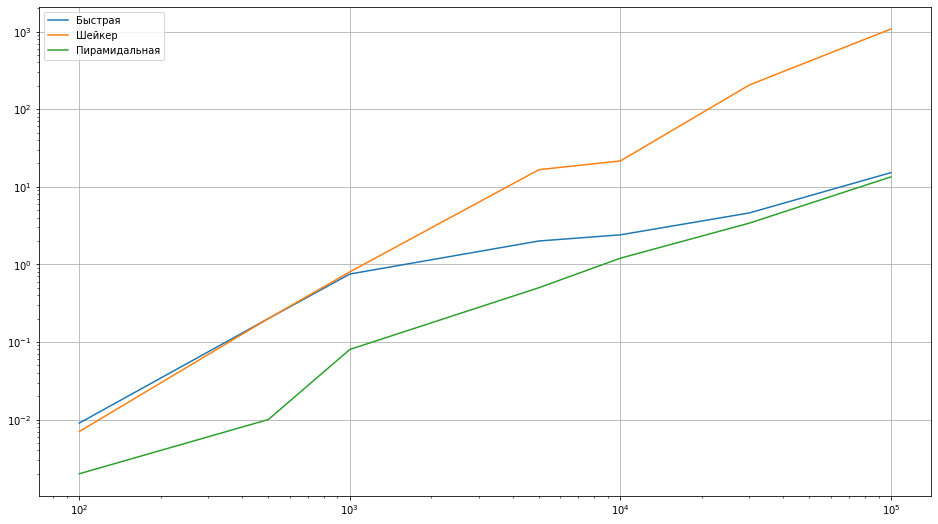

In [9]:
shaker = (0.007, 0.2, 0.8, 16.6, 21.5, 205.2, 1079.)
heap = (0.002, 0.01, 0.08, 0.5, 1.2, 3.4, 13.4)
quick = (0.009, 0.2, 0.75, 2.0, 2.4, 4.6, 15.2)
plt.figure(figsize=(16, 9))
plt.grid()
plt.loglog(sizes, quick, label='Быстрая')
plt.loglog(sizes, shaker, label='Шейкер')
plt.loglog(sizes, heap, label='Пирамидальная')
plt.legend()
plt.show()

Из графика следует, что наиболее оптимальной является пирамидальная сортировка, не сильно от нее отстает быстрая сортировка, Шейкер сортировка показала себя как самая медленная с очень большим разрывом на больших объемах данных (от 5000)